# Homework 0

**Author**: Pedro Pereira

**Date**: 2016-10-05

**Description**: Solutions to Exercise 1.1 of Nonlinear Control EL2620

## Markdown cheat sheet

How to write in markdown: [Markdown cheat sheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

## Description

![Pendulum Figure](PendulumFigure.png "Pendulum Figure")

The nonlinear dynamic equation for a pendulum is given by

$m l \ddot{\theta} = - mg \sin(\theta) - k l \dot{\theta}$

where $l$ is the length of the pendulum, $m$ is the mass of the bob, and $\theta$ is the angle subtended by the rod and the vertical axis through the pivot point

## Pendulum Constants

In [1]:
# mass
m = 1
# length of pendulum
l = 1
# acceleration due to gravity
g = 10
# friction coefficient (we will play with different values)
# k = 1 or k = 2


10

# Exercise 1.1 a)
Choose appropriate state variables and write down the state equations.

$z_1$ stands for the angular position (or $\theta$), and $z_2$ stands for the angular velocity (or $\dot{\theta}$, or $\omega$)


In [2]:
function f(x1,x2,k)
    # pay attention to the scope of variables
    # note that g and l are defined, but k is not
    (x2,-g/l*sin(x1) - k*l*x2)
end

f (generic function with 1 method)

# Exercise 1.1 b)

Find all equilibria of the system

**Definition**:
$x^{\star}$ is equilibrium of vector field $f$ (aka, state equations) if $f(x^{\star}) = 0$.

Let $x^{\star} = (x_1^{\star},x_2^{\star})$:

$
f(x^{\star}) = (0,0) 
\Leftrightarrow
\\
\Leftrightarrow
(x_2^{\star}, -\frac{g}{l} \sin(x_1^{\star}) - k l x_2^{\star}) = (0,0) 
\\
\Leftrightarrow
(x_2^{\star},\sin(x_1^{\star})) = (0,0)
\\
\Leftrightarrow
(x_2^{\star},x_1^{\star}) = (0, p\pi) \, \forall p \in \mathbb{Z}
\\
\Leftrightarrow
x^{\star} = (x_1^{\star},x_2^{\star}) = (p\pi,0) \, \forall p \in \mathbb{Z}
$

Indeed, notice that (next, I am taking $k=2$, just for illustration purposes)

In [3]:
f(0*pi,0,2)

(0,-0.0)

In [4]:
f(1*pi,0,2)

(0,-1.2246467991473533e-15)

# Exercise 1.1 c)

Linearize the system around the equilibrium points, and determine whether the system equilibria are stable or not (you may consider, if you wish, $k = 1$).

It suffices to check for equilibria $(x_1^{\star},x_2^{\star}) = (0,0)$ and $(x_1^{\star},x_2^{\star}) = (\pi,0)$ (explain why!)

\begin{align}
    A(x) 
    =
    &
    \frac{d f(y)}{d y}|_{y = x}
    &&
    \\
    =
    &
    \begin{bmatrix}
        \frac{\partial f_1(y_1,y_2)}{\partial y_1} & \frac{\partial f_1(y_1,y_2)}{\partial y_2}
        \\
        \frac{\partial f_2(y_1,y_2)}{\partial y_1} & \frac{\partial f_2(y_1,y_2)}{\partial y_2}
    \end{bmatrix}
    |_{(y_1,y_2)=(x_1,x_2)}
    && {\tiny f := (f_1,f_2), y := (y_1,y_2), x := (x_1,x_2)}
    \\
    =
    &
    \begin{bmatrix}
        \frac{\partial y_2}{\partial y_1} & \frac{\partial y_2}{\partial y_2}
        \\
        \frac{\partial \left(-\frac{g}{l} \sin(y_1) - k l y_2 \right) }{\partial y_1} & \frac{\partial \left(-\frac{g}{l} \sin(y_1) - k l y_2 \right)}{\partial y_2}
    \end{bmatrix}
    |_{(y_1,y_2)=(x_1,x_2)}
    && {\tiny f(y_1,y_2) := \left(y_2,-\frac{g}{l} \sin(y_1) - k l y_2\right)}
    \\
    =
    &
    \begin{bmatrix}
        0 & 1
        \\
        -\frac{g}{l} \cos(y_1) & - k l
    \end{bmatrix}
    |_{(y_1,y_2)=(x_1,x_2)}
    && {\tiny \text{simple calculations}}
    \\
    =
    &
    \begin{bmatrix}
        0 & 1
        \\
        -\frac{g}{l} \cos(x_1) & - k l
    \end{bmatrix}
   && {\tiny \text{replacement}}
\end{align}

### For the equilibria $x^{\star} = (x_1^{\star},x_2^{\star}) = (0,0)$, it follows that

\begin{align}
    A(x^{\star}) 
    =
    \begin{bmatrix}
        0 & 1
        \\
        -\frac{g}{l} & - k l
    \end{bmatrix}
    \Rightarrow
    &
    \det(\lambda I - A(x^{\star}) ) = 0
    \\
    \Leftrightarrow
    &
    \det
    \begin{bmatrix}
        \lambda & -1
        \\
        \frac{g}{l} & \lambda + k l
    \end{bmatrix}
    =0
    \\
    \Leftrightarrow
    &
    \lambda^2 + k l \lambda + \frac{g}{l} = 0
    \\
    \Leftrightarrow
    &
    \lambda = - \frac{k l}{2} \pm \sqrt{ \left(\frac{k l}{2}\right)^2 - \frac{g}{l}}
\end{align}


1. If $\frac{g}{l} > \left(\frac{k l}{2}\right)^2$, the eigenvalues are complex conjugate and the real part is $- \frac{k l}{2}$: since they are on the LHP, equilibrium is stable.

2. If $0< \frac{g}{l} < \left(\frac{k l}{2}\right)^2 $, the eigenvalues are real and the largest real part is $- \frac{k l}{2} + \sqrt{ \left(\frac{k l}{2}\right)^2 - \frac{g}{l}} < 0$: since they are on the LHP, equilibrium is stable.

### For the equilibria $x^{\star} = (x_1^{\star},x_2^{\star}) = (\pi,0)$, it follows that

\begin{align}
    A(x^{\star}) 
    =
    \begin{bmatrix}
        0 & 1
        \\
        \frac{g}{l} & - k l
    \end{bmatrix}
    \Rightarrow
    &
    \det(\lambda I - A(x^{\star}) ) = 0
    \\
    \Leftrightarrow
    &
    \det
    \begin{bmatrix}
        \lambda & -1
        \\
        -\frac{g}{l} & \lambda + k l
    \end{bmatrix}
    =0
    \\
    \Leftrightarrow
    &
    \lambda^2 + k l \lambda - \frac{g}{l} = 0
    \\
    \Leftrightarrow
    &
    \lambda = - \frac{k l}{2} \pm \sqrt{ \left(\frac{k l}{2}\right)^2 + \frac{g}{l}}
\end{align}


Since $\frac{g}{l} > 0$ it follows that $- \frac{k l}{2} + \sqrt{ \left(\frac{k l}{2}\right)^2 + \frac{g}{l}} >0$: since at least one eigenvalue is on the RHP, the equilibrium is unstable.



# Exercise 1.1 d) 
(this is not in the Exercise: it is just to further illustrate how to report)

Simulate system with $k =1$ and $k = 2$ and with initial condition  $x(0) = (x_1(0),x_2(0)) = (0.5\pi,0.1)$. Discuss the results


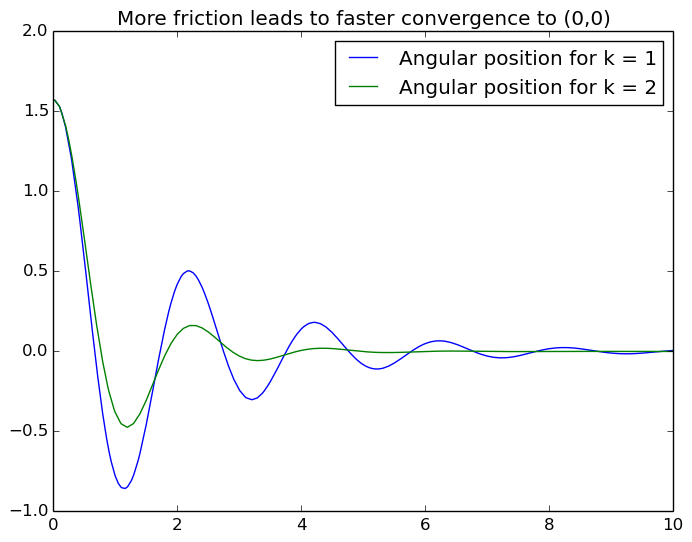

In [24]:
using ODE;
using PyPlot

for friction = [1;2]

    function vector_field(t, y)
        # Return the derivatives as a vector
        derivative = f(y[1],y[2],friction)

        # Return the derivatives as a vector
        return [derivative[1]; derivative[2]]
    end;

    # Initial conditions
    x0 = [0.5*pi; 0.1];

    # Time vector going from 0 to 10 in 0.1 increments
    time = 0:0.1:10.0;

    t, x = ODE.ode45(vector_field, x0, time)

    x_1 = map(x -> x[1], x)
    x_2 = map(x -> x[2], x);

    PyPlot.plot(t, x_1,label= "Angular position for k = $(friction)")
    
end

legend();
PyPlot.title("More friction leads to faster convergence to (0,0)");